<center><h1><b>Fake News Detector</b></h1></center>

<center><h4>Fake news is prevalent in today's society. Everyone should have the right to see the truth, not have to find it.</h4></center>

In [ ]:
!pip install numpy pandas sklearn matplotlib

Import relevant libraries.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


Read data into DataFrame, get shape of data and get first 5 records of data.

In [14]:
# Read data into DataFrame
df = pd.read_csv('news.csv')

#Get shape and head
df.shape
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Get labels from DataFrame.

In [15]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Split dataset into training and testing sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], labels, test_size=0.2, random_state=7) 

Initialise a TfidfVectorizer.

In [19]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

Initialize a PassiveAggressiveClassifier and predict on test set and calculate accuracy.

In [21]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate the accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


Got 92.82% accuracy from this model.

Plot confusion matrix to gain insight into the number of false and true negatives and positives

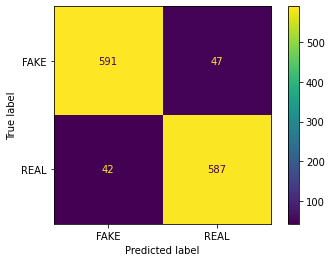

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE', 'REAL'])
disp.plot()
plt.show()